In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
train=pd.read_csv('D:\DataScience\June\Classification\Linear Regression\datasets_1256_2242_train.csv')
test=pd.read_csv('D:\DataScience\June\Classification\Linear Regression\datasets_1256_2242_test.csv')

In [173]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [174]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [175]:
train.isnull().any()

x    False
y     True
dtype: bool

In [176]:
test.isnull().any()

x    False
y    False
dtype: bool

In [177]:
train.isnull().sum()

x    0
y    1
dtype: int64

In [178]:
train=train.dropna()
test=test.dropna()

In [179]:
train.isnull().sum()

x    0
y    0
dtype: int64

In [180]:
x_train=np.array(train.iloc[:,:-1].values)
y_train=np.array(train.iloc[:,-1].values)
x_test=np.array(test.iloc[:,:-1].values)
y_test=np.array(test.iloc[:,1].values)

## Linear Regression

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [182]:
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

In [183]:
accuracy=reg.score(x_test,y_test)

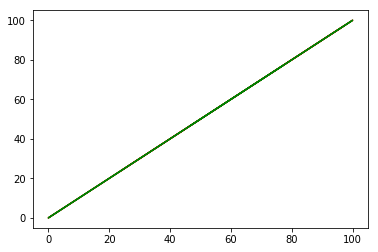

0.9888014444327563


In [184]:
plt.plot(x_train,reg.predict(x_train),color='red')
plt.plot(x_test,reg.predict(x_test),color='green')
#plt.plot(x_train,y_train)
plt.show()
print(accuracy)

## TheilSenRegressor

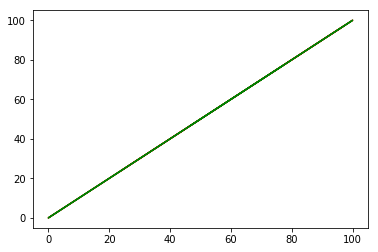

0.98870965900298


In [185]:
from sklearn.linear_model import TheilSenRegressor
ts=TheilSenRegressor()
ts.fit(x_train,y_train)
y_pred=ts.predict(x_test)
accuracy=ts.score(x_test,y_test)
plt.plot(x_train,reg.predict(x_train),color='red')
plt.plot(x_test,reg.predict(x_test),color='green')
plt.show()
print(accuracy)

## RANSAC Regressor

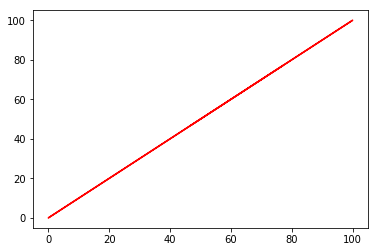

0.9888014444327563


In [186]:
from sklearn.linear_model import RANSACRegressor
rs=RANSACRegressor()
rs.fit(x_train,y_train)
y_pred=rs.predict(x_test)
accuracy=rs.score(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.show()
print(accuracy)

## Huber Regressor

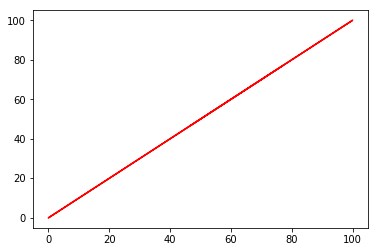

0.9888146261518426


In [187]:
from sklearn.linear_model import HuberRegressor
hr=HuberRegressor()
hr.fit(x_train,y_train)
y_pred=hr.predict(x_test)
accuracy=hr.score(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.show()
print(accuracy)

## Logistic Regession

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
import math

In [189]:
train=pd.read_csv(r'D:\DataScience\June\Classification\Titanic Machine Learning from disaster\train.csv')
test=pd.read_csv(r'D:\DataScience\June\Classification\Titanic Machine Learning from disaster\test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [190]:
train.drop(['Embarked'],axis=1,inplace=True)
train.drop(['PassengerId'],axis=1,inplace=True)
train.drop(['Name'],axis=1,inplace=True)
train.drop(['Ticket'],axis=1,inplace=True)
train.drop(['Cabin'],axis=1,inplace=True)
train.Sex=train.Sex.map({'male':0,'female':1})

In [191]:
y=train.Survived
x=train.drop(['Survived'],axis=1)
x.Age.fillna(x.Age.median(),inplace=True)

In [192]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=20)
lr=LogisticRegression(max_iter=500000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy=lr.score(x_test,y_test)
print(accuracy)

C:\Users\91897\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8116591928251121


In [193]:
print(confusion_matrix(y_test,y_pred))

[[124  18]
 [ 24  57]]


In [194]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       142
           1       0.76      0.70      0.73        81

   micro avg       0.81      0.81      0.81       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.81      0.81      0.81       223



## Gaussian Process Classifier

In [195]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=5)
from sklearn.gaussian_process import GaussianProcessClassifier
gc=GaussianProcessClassifier()
gc.fit(x_train,y_train)
y_pred=gc.predict(x_test)
accuracy=gc.score(x_test,y_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy)

[[122  18]
 [ 32  51]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83       140
           1       0.74      0.61      0.67        83

   micro avg       0.78      0.78      0.78       223
   macro avg       0.77      0.74      0.75       223
weighted avg       0.77      0.78      0.77       223

0.7757847533632287


## Support Vector Machine

In [196]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
df_svm=pd.read_csv('D:\DataScience\June\Classification\SVM Classification\datasets_249595_524945_UniversalBank.csv')

In [197]:
df_svm.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [198]:
df_svm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [199]:
df_svm.shape

(5000, 14)

In [200]:
df_svm.isnull().any()

ID                    False
Age                   False
Experience            False
Income                False
ZIP Code              False
Family                False
CCAvg                 False
Education             False
Mortgage              False
Personal Loan         False
Securities Account    False
CD Account            False
Online                False
CreditCard            False
dtype: bool

In [201]:
x=df_svm.iloc[:,1:13].values
y=df_svm.iloc[:,-1].values

In [202]:
x.shape

(5000, 12)

In [203]:
y.shape

(5000,)

In [204]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30)

In [205]:
svmc=SVC(kernel='rbf',random_state=0)
svmc.fit(x_train,y_train)
y_pred=svmc.predict(x_test)
accuracies=cross_val_score(estimator=svmc,cv=10,X=x_train,y=y_train)
accuracies.mean()

C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.7069353472143209

In [206]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       878
           1       0.40      0.01      0.01       372

   micro avg       0.70      0.70      0.70      1250
   macro avg       0.55      0.50      0.42      1250
weighted avg       0.61      0.70      0.58      1250



## NU Support Vector Classification

In [207]:
from sklearn.svm import NuSVC
nu_svm=pd.read_csv('D:\DataScience\June\Classification\SVM Classification\datasets_249595_524945_UniversalBank.csv')

In [208]:
x=nu_svm.iloc[:,1:13].values
y=nu_svm.iloc[:,-1].values

In [209]:
x.shape

(5000, 12)

In [210]:
y.shape

(5000,)

In [211]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.3)
nu_c=SVC(kernel='rbf',random_state=0)
nu_c.fit(x_train,y_train)
y_pred=nu_c.predict(x_test)
accuracies=cross_val_score(estimator=nu_c,X=x_train,y=y_train,cv=10)
accuracies.mean()

C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

0.7005760047020791

In [212]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.83      1076
           1       0.00      0.00      0.00       424

   micro avg       0.72      0.72      0.72      1500
   macro avg       0.36      0.50      0.42      1500
weighted avg       0.51      0.72      0.60      1500



In [214]:
accuracy=nu_c.score(x_test,y_test)
print(accuracy)

0.716


## Naive Bayes Algorithm

In [237]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [238]:
df=pd.read_csv('D:\DataScience\June\Classification\Classification Suv dataset\datasets_274070_567580_Social_Network_Ads.csv')

In [239]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [240]:
df=df.drop('User ID',axis=1)

In [241]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [243]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [244]:
df.Gender=df.Gender.map({'Male':0,'Female':1})

In [245]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [246]:
x=df.drop('Purchased',axis=1)
y=df.Purchased

In [247]:
x.head()

,Gender,Age,EstimatedSalary
0,0,19,19000
1,0,35,20000
2,1,26,43000
3,1,27,57000
4,0,19,76000


In [248]:
x.shape

(400, 3)

In [249]:
y.shape

(400,)

In [257]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)
accu=accuracy_score(y_test,y_pred)
print(accu)
ac=gnb.score(x_test,y_test)
print(ac)

0.925
0.925


C:\Users\91897\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\91897\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """


In [258]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

   micro avg       0.93      0.93      0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



In [259]:
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
ac=bnb.score(x_test,y_test)
print(ac)

0.825


In [261]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        58
           1       0.72      0.59      0.65        22

   micro avg       0.82      0.82      0.82        80
   macro avg       0.79      0.75      0.77        80
weighted avg       0.82      0.82      0.82        80



## KNN

In [262]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

In [263]:
train=pd.read_csv('D:\DataScience\June\Classification\Linear Regression\datasets_1256_2242_train.csv')
test=pd.read_csv('D:\DataScience\June\Classification\Linear Regression\datasets_1256_2242_test.csv')

In [268]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [272]:
train.isna().sum()

x    0
y    1
dtype: int64

In [277]:
train=train.dropna()

In [278]:
train.isna().any()

x    False
y    False
dtype: bool

In [279]:
test=test.dropna()

In [280]:
x_train=np.array(train.iloc[:,:-1].values)
y_train=np.array(train.iloc[:,1].values)
x_test=np.array(test.iloc[:,:-1].values)
y_test=np.array(test.iloc[:,1].values)

In [283]:
kns=KNeighborsRegressor(n_neighbors=2)
kns.fit(x_train,y_train)
y_pred=kns.predict(x_test)
#acc=accuracy_score(y_test,y_pred)
ass=kns.score(x_test,y_test)
print(ass)

0.9854793959456346


## Perceptron

In [284]:
from sklearn.linear_model import Perceptron
df=pd.read_csv('D:\DataScience\June\Classification\Iris Species\datasets_19_420_Iris.csv')

In [285]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [286]:
df.Species=df.Species.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})

In [287]:
df.Species.get_values()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [288]:
x=df.drop('Species',axis=1)
y=df.Species

In [306]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [307]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

C:\Users\91897\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\91897\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [308]:
pc=Perceptron()
pc.fit(x_train,y_train)
y_pred=pc.predict(x_test)
pcs=pc.score(x_test,y_test)
pcc=accuracy_score(y_test,y_pred)
print(pcs)
print(pcc)

0.9333333333333333
0.9333333333333333


C:\Users\91897\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [309]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.85      0.92        13
           2       0.75      1.00      0.86         6

   micro avg       0.93      0.93      0.93        30
   macro avg       0.92      0.95      0.92        30
weighted avg       0.95      0.93      0.94        30



## RandomForest

In [310]:
from sklearn.ensemble import RandomForestClassifier
rf=pd.read_csv('D:\DataScience\June\Classification\Mushroom Classification\datasets_478_974_mushrooms.csv')

In [311]:
rf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [316]:
rf['class'].get_values()

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [319]:
rf['class'].values

array(['p', 'e', 'e', ..., 'e', 'p', 'e'], dtype=object)

In [320]:
rf['cap-shape'].values

array(['x', 'x', 'b', ..., 'f', 'k', 'x'], dtype=object)

In [322]:
x=rf.drop('class',axis=1)
y=rf['class']

In [323]:
x=pd.get_dummies(x)
y=pd.get_dummies(y)

In [324]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=20)

In [325]:
clf=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acrf=clf.score(x_test,y_test)
print(acrf)

1.0


## Decision Tree

In [338]:
from sklearn.tree import DecisionTreeClassifier

In [339]:
df=pd.read_csv('D:\DataScience\June\Classification\Classification Suv dataset\datasets_274070_567580_Social_Network_Ads.csv')

In [354]:
df.Gender=df.Gender.map({'Male':0,'Female':1})

In [355]:
x=df.iloc[:,1:4].values
y=df.iloc[:,4].values

In [356]:
x.shape

(400, 3)

In [357]:
y.shape

(400,)

In [362]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [363]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)

C:\Users\91897\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [364]:
dtc=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtc.fit(x_train,y_train)
y_pred=dtc.predict(x_test)
dtac=dtc.score(x_test,y_test)
dtdc=accuracy_score(y_test,y_pred)
print(dtac)


0.9


In [365]:
print(dtdc)

0.9


## Extra Tree

In [4]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier

In [5]:
df=pd.read_csv('D:\DataScience\June\Classification\Classification Suv dataset\datasets_274070_567580_Social_Network_Ads.csv')

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.Gender=df.Gender.map({'Male':0,'Famale':1})

In [8]:
x=df.drop('Gender',axis=1)
y=df.Purchased

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
from sklearn.metrics import accuracy_score
ets=ExtraTreesClassifier(criterion='entropy',random_state=0)
ets.fit(x_train,y_train)
y_pred=ets.predict(x_test)
etc=ets.score(x_test,y_test)
etcc=accuracy_score(y_test,y_pred)
print(etc)
print(etcc)

1.0
1.0


C:\Users\91897\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\91897\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.
C:\Users\91897\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
dt=pd.read_csv('D:\DataScience\June\Classification\Classification Suv dataset\datasets_274070_567580_Social_Network_Ads.csv')

In [41]:
dt.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
dt.Gender=dt.Gender.map({'Male':0,'Female':1})

In [43]:
dt=dt.drop('User ID',axis=1)

In [46]:
x=dt.drop('Purchased',axis=1)
y=dt.Purchased

In [47]:
sc_x=StandardScaler()
x_train=sc_x.fit_transform(x_train)
x_test=sc_x.transform(x_test)
gbs=GradientBoostingClassifier()
gbs.fit(x_train,y_train)
y_pred=gbs.predict(x_test)
gbcs=gbs.score(x_test,y_test)
gbcc=accuracy_score(y_test,y_pred)
print(gbcs)
print(gbcc)

1.0
1.0


## New York Stock Exchange\LSTM

In [83]:
from tensorflow import keras
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import numpy as np

In [84]:
lstm=pd.read_csv(r'D:\DataScience\June\Classification\New York Stock Exchange\prices.csv')

In [85]:
lstm.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [86]:
lstm.shape

(851264, 7)

In [87]:
lstm=lstm[lstm['symbol']=='NFLX']
lstm['date']=pd.to_datetime(lstm['date'])

In [88]:
lstm.set_index('date',inplace=True)
lstm=lstm.reset_index()
lstm.head()

,date,symbol,open,close,low,high,volume
0,2010-01-04,NFLX,55.519999,53.479999,52.960001,55.730000,17239600.0
1,2010-01-05,NFLX,53.570001,51.510001,50.810001,53.599998,23753100.0
2,2010-01-06,NFLX,51.530001,53.319999,50.380002,53.710001,23290400.0
3,2010-01-07,NFLX,54.120000,52.400001,52.240001,54.300001,9955400.0
4,2010-01-08,NFLX,52.490000,53.300002,52.260001,54.199999,8180900.0


In [89]:
data=lstm.filter(['close'])
dataset=data.values
train_data_len=math.ceil(len(dataset)*0.75)
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
train_data=scaled_data[0:train_data_len,:]

In [90]:
scaled_data

array([[0.00660612],
       [0.00361439],
       [0.00636314],
       ...,
       [0.1165715 ],
       [0.11572106],
       [0.11339753]])

In [91]:
train_data

array([[0.00660612],
       [0.00361439],
       [0.00636314],
       ...,
       [0.55277306],
       [0.55423095],
       [0.56672946]])

In [92]:
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
x_train=np.array(x_train)
y_train=np.array(y_train)
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [93]:
model=Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model1.png')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 64)            16896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 52,033
Trainable params: 52,033
Non-trainable params: 0
_________________________________________________________________
Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [94]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=85,epochs=20)

Epoch 1/20
15/15 [==============================] - 1s 69ms/step - loss: 0.0247
Epoch 2/20
15/15 [==============================] - 1s 64ms/step - loss: 0.0035
Epoch 3/20
15/15 [==============================] - 1s 60ms/step - loss: 0.0012
Epoch 4/20
15/15 [==============================] - 1s 59ms/step - loss: 0.0010
Epoch 5/20
15/15 [==============================] - 1s 64ms/step - loss: 9.0805e-04
Epoch 6/20
15/15 [==============================] - 1s 63ms/step - loss: 7.9889e-04
Epoch 7/20
15/15 [==============================] - 1s 63ms/step - loss: 7.4382e-04
Epoch 8/20
15/15 [==============================] - 1s 67ms/step - loss: 7.1201e-04
Epoch 9/20
15/15 [==============================] - 1s 63ms/step - loss: 6.9982e-04
Epoch 10/20
15/15 [==============================] - 1s 63ms/step - loss: 6.7924e-04
Epoch 11/20
15/15 [==============================] - 1s 67ms/step - loss: 6.6458e-04
Epoch 12/20
15/15 [==============================] - 1s 64ms/step - loss: 6.3420e-04
Epoch

In [96]:
test_data=scaled_data[train_data_len-60:, :]
x_test=[]
y_test=dataset[train_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.86679898846491

## Apriori

In [107]:
ds=pd.read_csv('D:\DataScience\June\Classification\Grocery Store Data set\datasets_344_727_GroceryStoreDataSet.csv',names=['products'])

In [108]:
ds.head()

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"


In [110]:
data=list(ds['products'].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [114]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_data=te.fit(data).transform(data)
ds=pd.DataFrame(te_data,columns=te.columns_)
ds1=apriori(ds,min_support=0.01,use_colnames=True)
ds1.head()

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)


## CNN

In [139]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPool2D
import tensorflow as tf
train=pd.read_csv(r'D:\DataScience\June\Classification\Digit Recognizer\train.csv')
test=pd.read_csv(r'D:\DataScience\June\Classification\Digit Recognizer\test.csv')

In [140]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
x=np.array(train.drop('label',axis=1)).astype('float32')
y=np.array(train['label']).astype('float32')

In [151]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

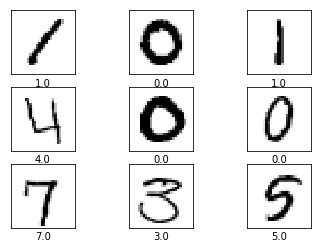

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [149]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x[i].reshape(28,28),cmap=plt.cm.binary)
    plt.xlabel(y[i])
plt.show()
x=x/255.0
x=x.reshape(-1,28,28,1)
y=to_categorical(y)
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=0)
x_test=np.array(test).astype('float32')
x_test=x_test/255.0
x_test=x_test.reshape(-1,28,28,1)
plt.figure(figsize=(10,10))

In [154]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='model1.png')

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)         

In [161]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
history=model.fit(x_train,y_train,epochs=10,batch_size=85,validation_data=(x_val,y_val))

Epoch 1/10
346/346 [==============================] - 136s 393ms/step - loss: 0.2871 - accuracy: 0.9064 - val_loss: 0.0634 - val_accuracy: 0.9804
Epoch 2/10
346/346 [==============================] - 135s 391ms/step - loss: 0.0875 - accuracy: 0.9730 - val_loss: 0.0507 - val_accuracy: 0.9838
Epoch 3/10
346/346 [==============================] - 135s 389ms/step - loss: 0.0630 - accuracy: 0.9810 - val_loss: 0.0380 - val_accuracy: 0.9875
Epoch 4/10
346/346 [==============================] - 137s 395ms/step - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0330 - val_accuracy: 0.9895
Epoch 5/10
346/346 [==============================] - 135s 389ms/step - loss: 0.0461 - accuracy: 0.9862 - val_loss: 0.0394 - val_accuracy: 0.9871
Epoch 6/10
346/346 [==============================] - 135s 389ms/step - loss: 0.0400 - accuracy: 0.9877 - val_loss: 0.0349 - val_accuracy: 0.9905
Epoch 7/10
346/346 [==============================] - 134s 388ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0328 -

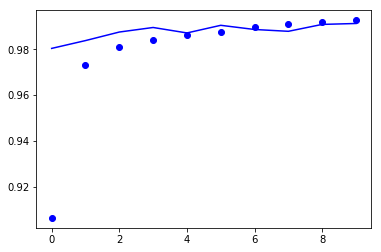

394/394 [==============================] - 7s 17ms/step - loss: 0.0321 - accuracy: 0.9913
[0.03206421062350273, 0.9912698268890381]


In [162]:
accuracy=history.history['accuracy']
val_accuracy=history.history['val_accuracy']
epochs=range(len(accuracy))
plt.plot(epochs,accuracy,'bo', label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.show()
print(model.evaluate(x_val,y_val))